In [1]:
## Aug1 - Occurences by genotype graph & Area under prevalence curve

In [2]:
# Config: 40-yr-simu, 50,000-popu, 0.7-treatment-cvrg, DHAPPQ-ASAQ-AL-cycling

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
plt.rcParams['figure.figsize'] = [20,10]

In [5]:
# Build geno dict for text replacement
#genodb_df = pd.read_excel('geno-database.xlsx')
# converting df to series, and then to dict
#geno_dict = genodb_df.set_index('ID')['Shortname']

In [6]:
# creating dfs from file
df1 = pd.read_csv('new-monthly_data_0.txt', sep='\t')
#df1 = df1.set_index('current_time')
#df2 = pd.read_csv('mut_arrival.txt', sep='\t')
###--# Text replacement
#df2['to'] = df2['to'].replace(geno_dict)
#df2['from'] = df2['from'].replace(geno_dict)

In [7]:
# scale func to show x-axis in years
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

Text(0.5, 1.0, 'Blood Slide Prev. Plot')

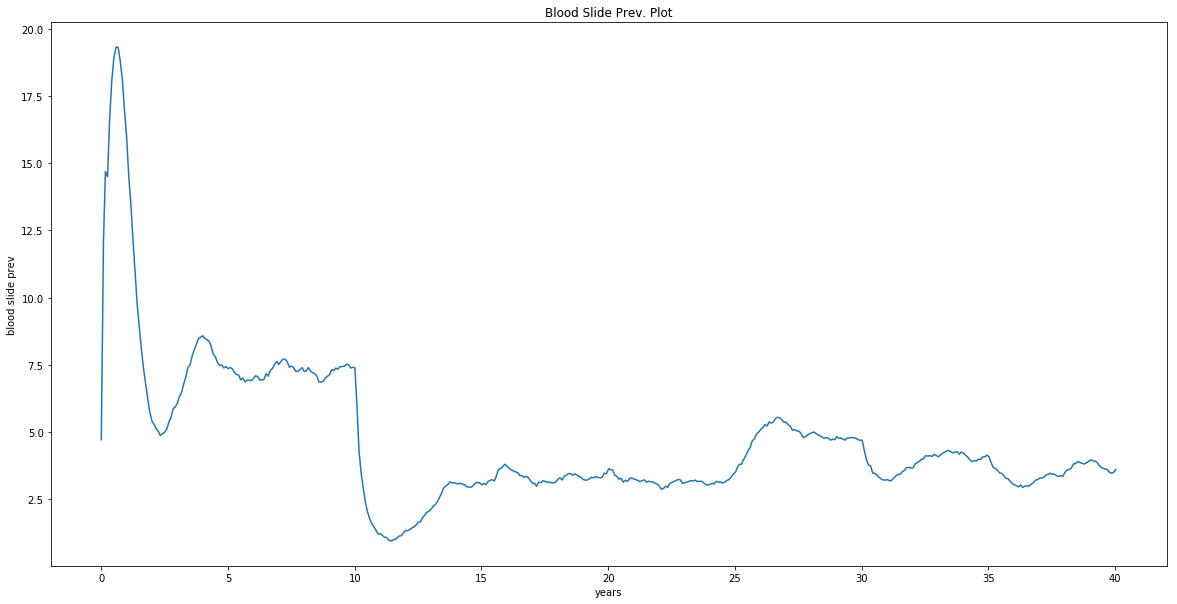

In [11]:
# total population blood_slide_prevalence plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df1['current_time'], df1['blood_slide_prev'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1825)) # 5-year mark
ax1.xaxis.set_major_formatter(ticks_x)
ax1.set_xlabel('years')
ax1.set_ylabel('blood slide prev')
ax1.set_title('Blood Slide Prev. Plot')

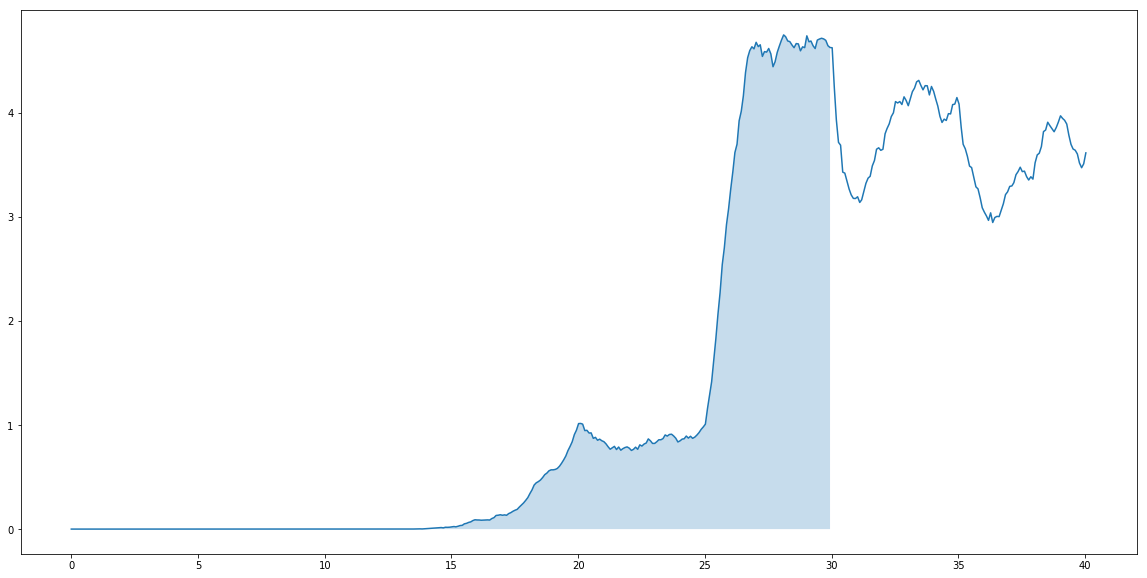

In [9]:
# blood slide prev w.r.t. genotype frequency
fig = plt.figure()
ax2 = fig.add_subplot(111)
df1['new_bsp'] = df1['blood_slide_prev'] * df1.iloc[:,0:151].filter(regex='.....Y2.', axis=1).sum(axis=1)
ax2.plot(df1['current_time'], df1['new_bsp'])
ax2.fill_between(df1['current_time'], df1['new_bsp'], 
                 where=(df1['current_time']<30*365), alpha=0.25)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1825)) # 5-year mark
ax2.xaxis.set_major_formatter(ticks_x)
#ax1.set_xlabel('years')
#ax1.set_ylabel('blood slide prev')
#ax1.set_title('Blood Slide Prev. Plot')


In [10]:
np.trapz(df1.iloc[:30*12,-1])

307.39457760769545